<a href="https://colab.research.google.com/github/Firdous-Bin-Ismail/Car_price_prediction/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ford.csv to ford.csv


In [4]:
df = pd.read_csv("ford.csv")

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [6]:
df['model'].value_counts()

,count
model,
Fiesta,6557
Focus,4588
Kuga,2225
EcoSport,1143
C-MAX,543
Ka+,531
Mondeo,526
B-MAX,355
S-MAX,296


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [11]:
df.shape

(17966, 9)

In [16]:
df.duplicated().sum()

np.int64(154)

In [17]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


<Axes: >

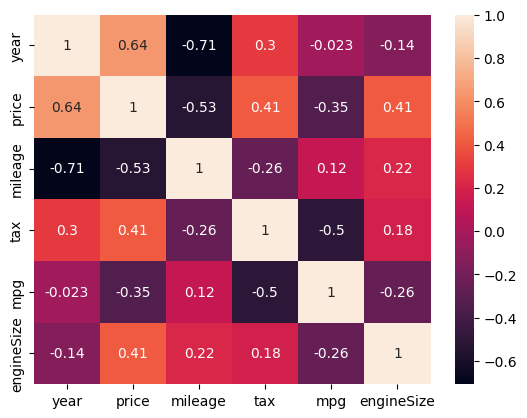

In [21]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [22]:
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(17812, 9)

<Axes: xlabel='model', ylabel='price'>

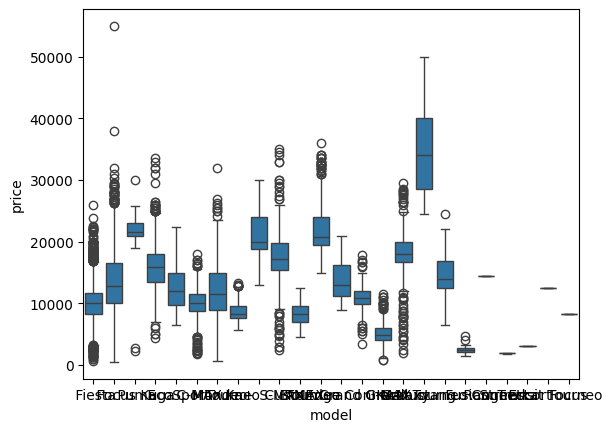

In [28]:
sns.boxplot(data= df, x= 'model', y='price')
#plt.xticks(rotation =90)

<Axes: xlabel='transmission', ylabel='price'>

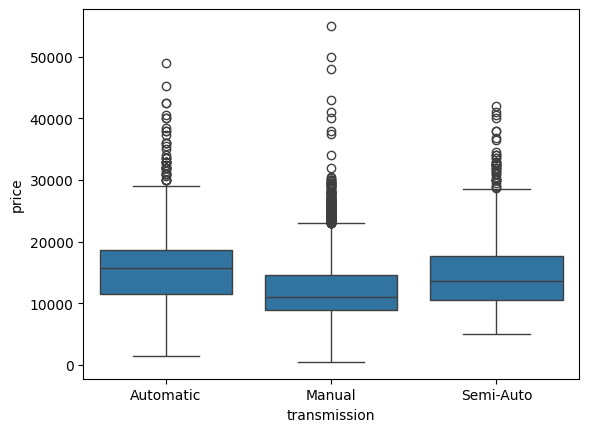

In [29]:
sns.boxplot(data= df, x= 'transmission', y='price')

<Axes: xlabel='fuelType', ylabel='price'>

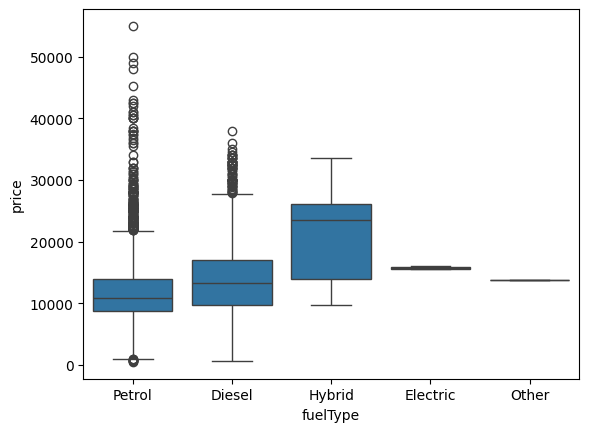

In [30]:
sns.boxplot(data= df, x= 'fuelType', y='price')

In [33]:
X = df.drop(columns='price',axis =1)
y = df['price']

In [34]:
X_encode = pd.get_dummies(X, columns= ['model', 'transmission', 'fuelType'], drop_first=True)

In [35]:
X_encode.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [36]:
X_encode =X_encode.astype(int)

In [37]:
X_encode.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Num_col = ['mileage','tax','mpg','year','engineSize']

In [41]:
X_encode[Num_col]= scaler.fit_transform(X_encode[Num_col])

In [44]:
X_encode.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.067059,-0.382994,0.591380,-0.042291,-0.446958,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.554393,-0.736317,0.591380,-0.042291,-0.446958,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.067059,-0.562616,0.591380,-0.042291,-0.446958,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.041726,-0.665405,0.510777,-1.720193,-0.446958,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.041726,-1.127749,0.510777,-0.930592,-0.446958,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.33, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
r2

0.8310659101766334

In [51]:
n=  X_test.shape[0]
p=  X_test.shape[1]

In [52]:
adj_r2 = 1-((1-r2)*(n-1)/(n-1-p))

In [53]:
adj_r2

0.8300828947643462